# Case1

In [1]:
# library import
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
os.getcwd()

'C:\\Users\\이신행\\self practice'

In [3]:
data=pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1.0,0,3,7,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2.0,0,3,7,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,1.0,0,3,6,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1.0,0,5,7,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1.0,0,3,8,1987,0,98074,47.6168,-122.045


In [4]:
# shape 파악
nCar = data.shape[0] # 데이터 개수
nVar = data.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 21613 nVar: 14


In [5]:
data.shape

(21613, 14)

In [6]:
# 의미가 없다고 생각되는 변수 제거
data = data.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis = 1) # id, date, zipcode, lat, long  제거

In [9]:
feature_columns=list(data.columns.difference(['price'])) # price-target, 그 외 feature
X = data[feature_columns]
y = data['price']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# train/test 비율을 7:3
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인

(15129, 8) (6484, 8) (15129,) (6484,)


In [10]:
!pip install lightgbm

In [11]:
# lightgbm을 구현하여 shap value를 예측할 것
# ligthgbm 구현

# library
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE

C:\anaconda\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 15129, number of used features: 8
[LightGBM] [Info] Start training from score 537729.263666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

In [13]:
!pip install shap

In [14]:
# shap value를 이용하여 각 변수의 영향도 파악

# !pip install shap (에러 발생시, skimage version 확인 (0.14.2 이상 권장))
# import skimage -> skimage.__version__ (skimage version 확인)
# skimage version upgrade -> !pip install --upgrade scikit-image

# shap value 
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산

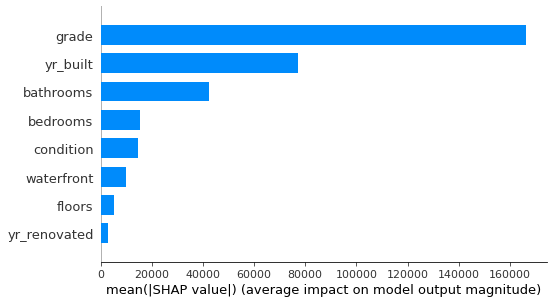

In [15]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, test_x, plot_type = "bar")

# Case 2

scikit-learn의 load_cancer활용

In [26]:
pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582645 sha256=ad1ffa7c231019b6c6c9eca69e6de832d95df0aa55bf0658cf7f15a7c7010d06
  Stored in directory: c:\users\이신행\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn
Note: you may need to restart the kernel to use updated packages.


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.972
특성 중요도 : 
[0.02515433 0.01563844 0.05372655 0.04861645 0.00769078 0.00936994
 0.05539489 0.10305394 0.0065771  0.00282708 0.02921459 0.00607814
 0.01342868 0.03420174 0.00360641 0.00432096 0.00448775 0.00657502
 0.00460597 0.00627095 0.11657269 0.01603133 0.16027724 0.0634688
 0.01356448 0.01164113 0.03923725 0.11711756 0.01164259 0.00960721]


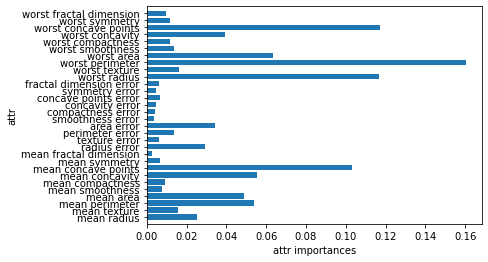

In [27]:
# coding: utf-8



from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import mglearn

import numpy as np



cancer = load_breast_cancer()



# 훈련/테스트 세트로 나누기

X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=0)



forest = RandomForestClassifier(n_estimators=100,random_state=0)

forest.fit(X_train,y_train)



print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))



# 특성 중요도

print("특성 중요도 : \n{}".format(forest.feature_importances_))



# 특성 중요도 시각화 하기

def plot_feature_importances_cancer(model):

    n_features = cancer.data.shape[1]

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), cancer.feature_names)

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plt.show()



plot_feature_importances_cancer(forest)

단일 트리의 결과와 마찬가지로 랜덤 포레스트도 "worst radius"특성이 중요하다고 보지만, 가장 많은 정보를 가진 특성으로는 "worst perimeter"를 선택했다.



랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있다.









<장단점과 매개변수>



회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.



랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며, 데이터의 스케일을 맞출 필요도 없다.



기본적으로 랜덤 포레스트는 단일 트리의 단점을 보완하고 장점은 가지고 있다.



대량의 데이터셋에서 랜덤 포레스트 모델을 만들 때 다소 시간이 걸릴 수 있지만 CPU코어가 많다면 손쉽게 병렬 처리할 수있다.

n_jobs 매개변수를 이용하여 사용할 코어 수를 지정할  수 있다.

(n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용한다.)





주의할점



랜덤 포레스트는 랜덤하기때문에 random_state를 다르제 지정하면 전혀 다른 모델이 만들어진다.

당연히 랜덤 포레스트의 트리가 많을수록 random_state값의 변화에 따른 변동이 적다.



랜덤 포레스트는 텍스트 데이터와 같이 매우 차원이 놓고 희소한 데이터에는 잘 작동하지 않는다.

이러한 데이터에는 선형 모델이 더 적합하다.

메모리를 많이 사용하기에 훈련과 예측이 느리다.



중요 매개변수는 n_estimators, max_features이고 max_depth 같은 사전 가지치기 옵션이 있다.

n_estimators는 클수록 좋다. 더 많은 트리를 평군하면 과대 적합을 줄여 안정적인 모델을 만둘 수 있다. (메모리와 훈련시간은 증가한다.)



max_features는 각 트리가 얼마나 무작위가 될지를 결정하며, 작은 max_features는 과대적합을 줄인다. 일반적으로는 기본값을 쓰면된다.

# case 3

파이썬 머신러닝 완벽가이드 책 참조

XGBoost 이용

In [30]:
import xgboost

print(xgboost.__version__)

1.3.3


In [31]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features= dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target']= y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [32]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [33]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label,
                                         test_size=0.2, random_state=156 )
print(X_train.shape , X_test.shape)

(455, 30) (114, 30)


In [34]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [35]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss'
        }
num_rounds = 400

In [36]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14]	train-logloss:0.16522	eval-logloss:0.20857
[15]	train-logloss:0.15362	eval-logloss:0.19999
[16]	train-logloss:0.14333	eval-logloss:0.19012
[17]	train-logloss:0.13398	eval-logloss:0.18182
[18]	train-logloss:0.12560	eval-logloss:0.17473
[19]	train-logloss:0.11729	eval-logloss:0.16766
[20]	train-logloss:0.10969	eval-logloss:0.15820
[2

[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:0.00687	eval-logloss:0.08683
[183]	train-logloss:0.00685	eval-logloss:0.08658
[184]	train-logloss:0.00683	eval-logloss:0.08659
[185]	train-logloss:0.00681	eval-logloss:0.08661
[186]	train-logloss:0.00680	eval-logloss:0.08637
[187]	train-logloss:0.00678	eval-logloss:0.08637
[188]	train-logloss:0.00676	eval-logloss:0.08630
[189]	train-logloss:0.00675	eval-logloss:0.08610
[190]	train-logloss:

In [37]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [39]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

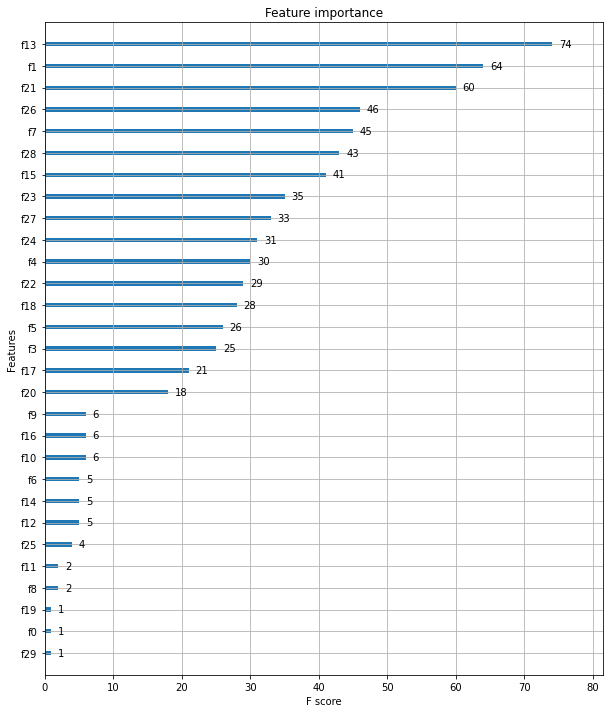

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)